<h1>An integrated model for simulation of neonatal physiology.</h1>
Antonius TAJ, van Meurs WL, Westerhof BE, de Boode WP

<h2>Introduction</h2>

This interactive python notebook contains the python code of the Explain model. The purpose of this notebook is to match the python code to the research paper. This means that the code is not optimized for speed nor modular in design but is made for readability and explanation. All the code is in one notebook which facilitates the use and sharing but also makes it easier to run (p.e. in Google Colab). By following this notebook step-by-step you'll get a better understanding on how the Explain model actually works. Feel free to add, remove, improve, share or spread this notebook. A reference to the original authors however will be much appreciated.
You can find a more optimized and modular version of the Explain engine in the github repository : https://github.com/dobutamine/explain_python.git

<h3>Python requirements</h3>

Import the required python modules

In [1]:
components = {}

<h2>EXPLAIN model diagram</h2>

<div>
    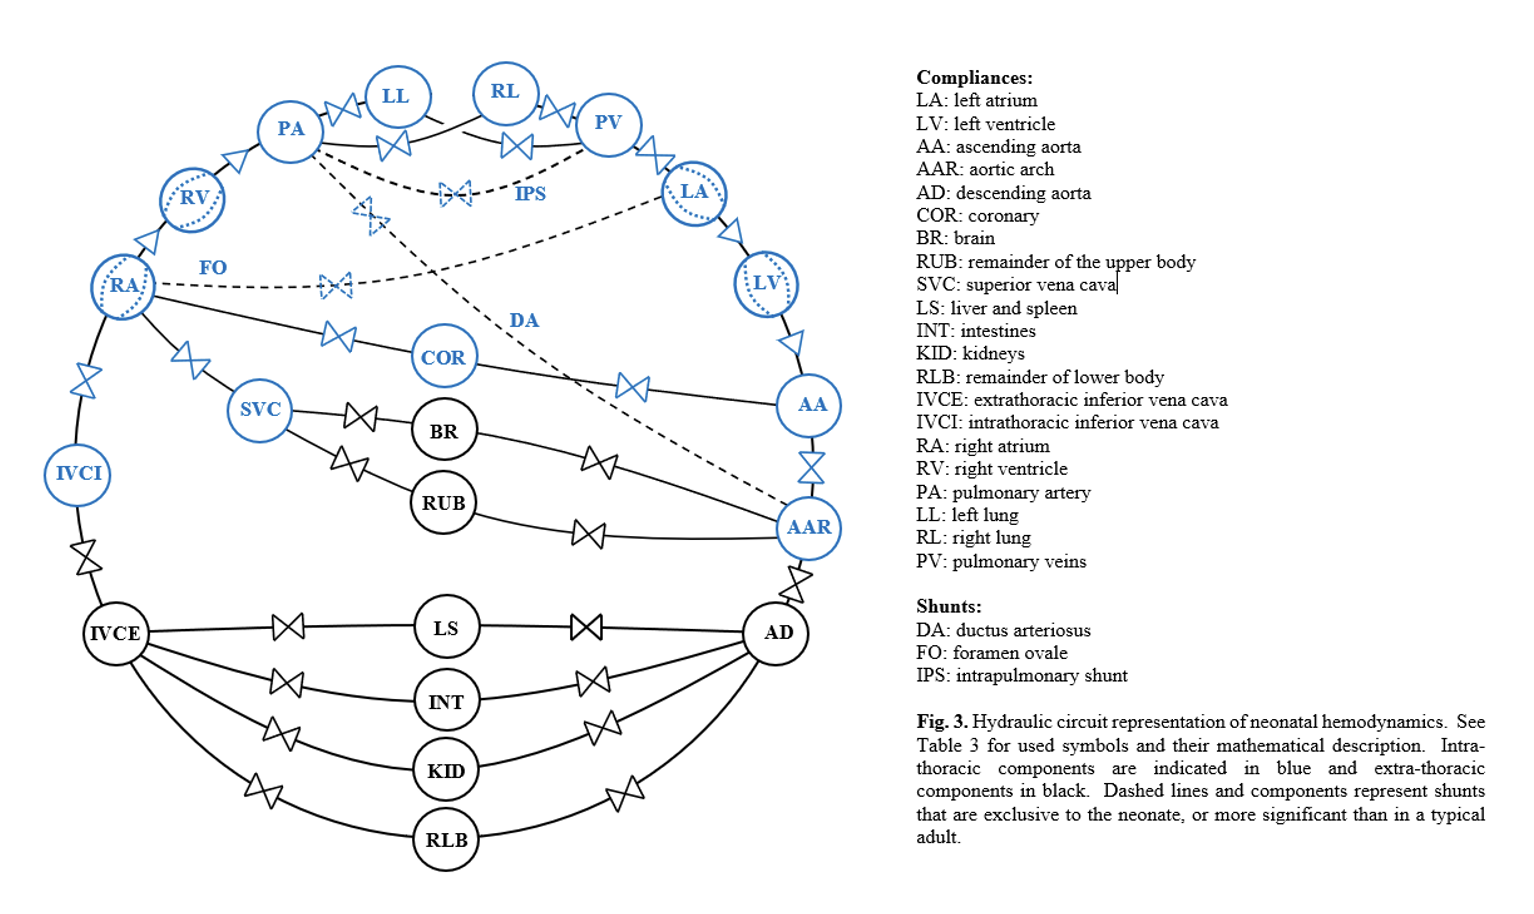
</div>

<h2>EXPLAIN elements</h2>

<h3>Part I: The cardiovascular system</h3>

<h4>Fluid circuit elements</h4>

<h5><u>Compliance</u></h5>
    <div>
        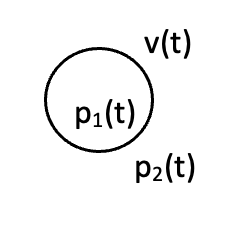
    </div>

<p>
    A compliance object is a fluid circuit element which holds a volume of blood (v(t)) and has an unstressed volume (UV). It calculates the transmural-pressure (p1(t)) depending on the recoil-pressure and the outside pressure (p2(t)). The recoil-pressure (p1(t)) is dependent on the elastance (E(t)) which has a non-linear relation with the volume depending on constant K3.
    <div>
        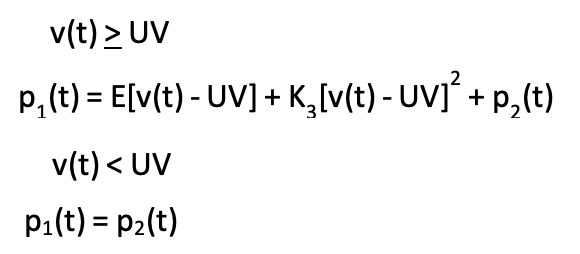
    </div><br>
    A compliance object is represented by a python class object called Compliance which exposes five methods and a number of properties. The __init__ method is called when the compliance is instantiated and takes two arguments. The first argument is a reference to the complete model and the second is an object containing the values of the compliance properties. A compliance is instantiated by the model engine during the model initialization routine using the property values stored in a <a href="#properties">model properties object</a>. The calculate_pressure is called at every step of the model run and calculates the pressure of the compliance. The volume_in method takes two arguments. The first argument is the volume in liters which is being transferred to the compliance and the second argument is a reference to the compliance which donates the volume. The volume_out method takes one argument which holds the volume in liters which is being removed from the compliance. The protect_mass_balance method guards the situation where the volume of the compliance is less than the volume which is being removed from the compliance. It prevents negative volumes which can cause mass balance problems.
</p>

<h5><u>Resistor</u></h5>
    <div>
        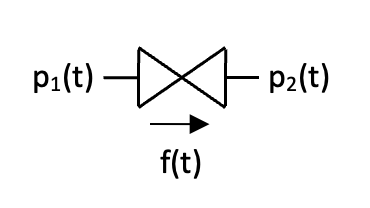
    </div>
<p>
    A resistor object is a fluid circuit element which connects two compliance objects with pressures p1(t) and p2(t) and is capable of calculating the flow between these two compliance objects. The constants K1 and K2 and the flow f(t) determine the non-linear flow-dependent resistance. Rf and Rb are the resistances depending on the flow direction.
    <div>
        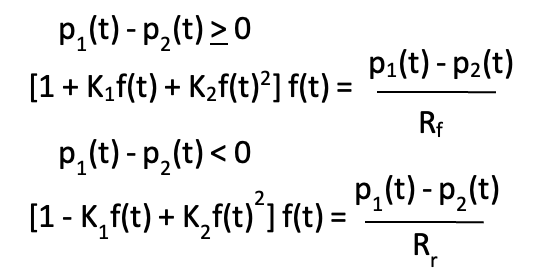
    </div><br>
    A resistor represented by a python class object called Resistor which exposes three methods and a number of properties. 
    The __init__ method is called when the resistor is instantiated and takes two arguments. The first argument is a reference to the complete model and the second is an object containing the values of the resistor properties. A resistor is instantiated by the model engine during the model initialization routine using the property values stored in a model properties object. The calculate_flow method is called at every step of the model run and calculates the flow between the compliances which the connector connects and updates the volumes of these compliances. The calculate_resistance method determines the resistance and takes two arguments containing the pressures of the compliances this resistance connects. The resistance is flow-direction and flow dependent.
</p>

<h5><u>Time-varying elastance</u></h5>
<div>
        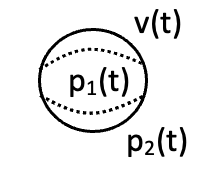
    </div>
<p>
        A time-varying elastance object is a fluid circuit element which holds a volume of blood, has an unstressed volume (UV) and can vary the elastance between a minimal (Emin) and maximal value (Emax) in time. It calculates the transmural-pressure (p1(t)) depending on the recoil-pressure (Ped(t) and Pes(t)) and the outside pressure (p2(t)). The pressure is dependent on the time-varying elastance factor (a(t)) and has a non-linear relation with the volume determined by the constant K3.
</p>
    <div>
    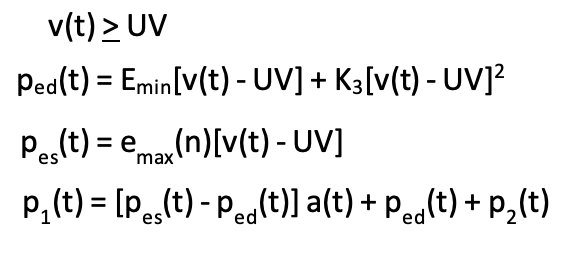
    </div>
<p>    
    A time-varying elastance object is represented by a python class object called Time-varying elastance which exposes five methods and a number of properties. The __init__ method is called when the compliance is instantiated and takes two arguments. The first argument is a reference to the complete model and the second is an object containing the values of the compliance properties. A compliance is instantiated by the model engine during the model initialization routine using the property values stored in a model properties object. The calculate_pressure is called at every step of the model run and calculates the pressure of the compliance. The volume_in methods takes two arguments. The first argument is the volume in liters which is being transferred to the compliance and the second argument is a reference to the compliance which donates the volume. The volume_out methods takes one argument which holds the volume in liters which is being removed from the compliance. The protect_mass_balance guards the situation where the volume of the compliance is less than the volume which is being removed from the compliance. It prevents negative volumes which can cause mass balance problems.
</p>

<h5><u>Valve</u></h5>
<div>
        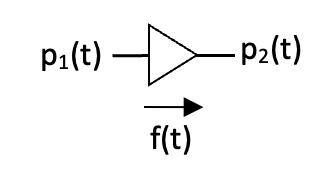
    </div>
<p>
     A valve object is a fluid circuit element which connects two compliance objects with pressures p1(t) and p2(t) and is capable of calculating the flow between these two compliance objects. The constants K1 and K2 and the flow f(t) determine the non-linear flow-dependent resistance. Rf is the baseline resistance. A valve as unidirectional flow.
    <div>
        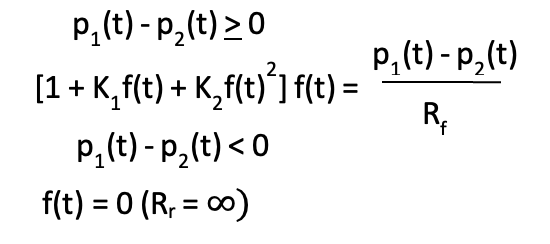
</div>
<p>
    A valve is a python class object called Valve which exposes three methods and a number of properties. 
    The __init__ method is called when the valve is instantiated and takes two arguments. The first argument is a reference to the complete model and second is an object containing the values of the valve properties. A valve is instantiated by the model engine during the model initialization routine using the property values stored in a model properties object. The calculate_flow method is called at every step of the model run and calculates the flow between the compliances which the connector connects and updates the volumes of these compliances. The calculate_resistance method determines the resistance and takes two arguments containing the pressures of the compliances this valve connects. The valve is flow-direction and flow dependent.
</p>

<h4>Models</h4>

<h5>ECG</h5>
<p>
    The ECG model takes care of the timings of the activation functions of the atria and ventricles of the heart and  generates the ECG signal waveform.
    </p>

<h5>Heart</h5>
<p>
    The heart model is based on the time-varying elastance models by Beneken and Suga. In these models the elastance of the heart chambers is varied by an activation function. These activation functions have a value between 0 and 1.
    The atria are activated by a half sinusoid function over a time interval Tas, where Tas is the duration of the atrial systole. The start time of the activation function is determined by the ECG model.
    The ventricles are activated by a slightly skewed half sinusoid function over a time interval Tvs, where Tvs is the duration of the ventricular systole. The start time of the activation function is determined by the ECG model.
</p>

<h5>Autonomic nervous system (ANS)</h5>

<h2>EXPLAIN model engine</h2>

In [1]:
from Engine import Engine
tim = Engine('definitions/normal_neonate_24h.json')

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "/usr/local/bin/python3"
  * The NumPy version is: "1.21.2"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: dlopen(/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_multiarray_umath.cpython-39-darwin.so, 2): no suitable image found.  Did find:
	/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_multiarray_umath.cpython-39-darwin.so: mach-o, but wrong architecture
	/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_multiarray_umath.cpython-39-darwin.so: mach-o, but wrong architecture
